---
# Density Functional Theory for H<sub>2</sub> Molecule
## Part 2 - Calculation of Total Energy
#### [C. N. Rangkuti ](https://quasi.id/team/staff/choi002.html) - [Research Center for Quantum Physics, BRIN, Indonesia](https://quantumresearch.id/)
---

## The total electronic energy of a many-electron system

Density Functional Theory (DFT) postulates that the total energy $E$ of a system can be expressed as a functional of the electron density $n(\mathbf{r})$:

$$
E_{\mathrm{total}}[n(\mathbf{r})] = E_{\mathrm{T}}[n(\mathbf{r})] + E_{\mathrm{V}}[n(\mathbf{r})] + E_{\mathrm{J}}[n(\mathbf{r})] + E_{\mathrm{X}}[n(\mathbf{r})] + E_{\mathrm{C}}[n(\mathbf{r})] 
$$

  - $E_{\mathrm{total}}[n(\mathbf{r})]=$  Total energy as a functional of the electron density $n(\mathbf{r})$
  - $E_{\mathrm{T}}[n(\mathbf{r})]= $ The kinetic energy functional of the noninteracting electron gas
  - $E_{\mathrm{V}}[n(\mathbf{r})]= $ The Coulomb energy between the electrons and the nuclei.
  - $E_{\mathrm{J}}[n(\mathbf{r})]= $ The Coulomb energy of the electrons in the field generated by the total electron density or the Hartree energy
  - $E_{\mathrm{X}}[n(\mathbf{r})]= $ Exchange energy functional
  - $E_{\mathrm{C}}[n(\mathbf{r})]= $ Correlation energy functional
  
> While the first two terms ($E_{\mathrm{T}}[n(\mathbf{r})]$ and $E_{\mathrm{J}}[n(\mathbf{r})]$) are consistently **positive**, the subsequent three terms ($E_{\mathrm{V}}[n(\mathbf{r})]$ ,$E_{\mathrm{X}}[n(\mathbf{r})]$, and $E_{\mathrm{C}}[n(\mathbf{r})]$) are invariably **negative**.

## Kohn-Sham Equation

$$
\left( -\frac{1}{2}\nabla^2 + V(\mathbf{r}) + \int dV'\frac{n(\mathbf{r})}{|\mathbf{r-r'}|} + V_\mathrm{X}+V_\mathrm{C} \right) \psi_k(\mathbf{r})
=
\varepsilon_k \psi_k(\mathbf{r})
$$

which $n(\mathbf{r})$ is the total charge density and defined as:
$$
n(\mathbf{r}) = \sum_{k=1}^N\int dV\psi_k^*(\mathbf{r})\psi_k(\mathbf{r})
$$
If we multiply from the left the Kohn-Sham equation by: $$\sum_{k=1}^N\int dV\psi_k^*(\mathbf{r})$$
we can write: 

$$
\sum_{k=1}^N\int dV\psi_k^*(\mathbf{r})\left( -\frac{1}{2}\nabla^2 + V(\mathbf{r}) + \int dV'\frac{n(\mathbf{r})}{|\mathbf{r-r'}|} + V_\mathrm{X}+V_\mathrm{C} \right) \psi_k(\mathbf{r})
=
\sum_{k=1}^N\int dV\psi_k^*(\mathbf{r})\varepsilon_k \psi_k(\mathbf{r})
$$

then we can identify **the expression of energy components**.



| No. |                 Energy components                 |                                                      Expressions                                                      |                                           More explicit expressions                                           |                                          Integral Methods                                         |
|:---:|:-------------------------------------------------:|:---------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------:|
|  1. | The kinetic energy                                | $$  E_{\mathrm{T}}[n(\mathbf{r})] = -\frac{1}{2}\sum_{k=1}^N\int dV\psi_k^*(\mathbf{r})\nabla^2 \psi_k(\mathbf{r}) $$ | $$ E_\mathrm{T}[n] = \frac{\alpha^2}{(1+S)}(1-2K-S) $$                                                        |                                        Fundamental integrals                                       |
|  2. | The Coulomb energy (electrons - nuclei repulsion) | $$ E_{\mathrm{V}}[n(\mathbf{r})] = \int dV V(\mathbf{r})  n(\mathbf{r}) $$                                            | $$ E_\mathrm{V}[n] = \frac{2\alpha}{(1+S)}(-1+J-2K) $$                                                        |                                        Fundamental integrals                                       |
|  3. | The Coulomb energy (electrons - electrons)        | $$ E_{\mathrm{J}}[n(\mathbf{r})] = \frac{1}{2}\int dV dV' \frac{n(\mathbf{r})n(\mathbf{r'})}{\|\mathbf{r-r'}\|} $$    | $$ E_\mathrm{J}[n] = \frac{\alpha}{(1+S)^2}\left[\frac{5}{8}+J'+4L+2K'\right] $$                              |                                        Fundamental integrals                                       |
|  4. | The exchange energy                               | $$ E_{\mathrm{X}}[n(\mathbf{r})] = \int dV n(\mathbf{r}) V_{\mathrm{X}}   $$                                          | $$ E_\mathrm{X}[n] = -\frac{9}{8}c\left(\frac{3}{\pi}\right)^\frac{1}{3}\int n(\mathbf{r})^\frac{4}{3} dV) $$ | Fundamental integrals & numerical integral over 3D space using nquad function from scipy.integrate |
|  5. | The exchange energy                               | $$ E_{\mathrm{C}}[n(\mathbf{r})] = \int dV n(\mathbf{r}) V_{\mathrm{C}}   $$                                          |                                                 not calculated                                                |                                                 -                                                 |
|     |                                                   |                                                                                                                       |                                                                                                               |                                                                                                   |

> Note: You can find the fundamental integral and the expressions of $w$-Dependence from [Halpern <i>et al</i>](https://pubs.acs.org/doi/abs/10.1021/ed400234g)

In [1]:
import math
import numpy as np
import scipy as sp
from scipy.integrate import nquad

In [2]:
from datetime import datetime 
import os
import csv

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

See table the expressions of 𝑤 -Dependence ($w=\alpha R$) ; R = bondlength of H<sub>2</sub> molecule

| Integral |                                                                                  Expression                                                                                 |
|:--------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|    $S$   |                                                                   $$e^{-w}\left(1+w+\frac{1}{3}^2\right)$$                                                                  |
|   $S'$   |                                                                   $$e^{w}\left(1-w+\frac{1}{3}^2\right)$$                                                                   |
|    $J$   |                                                              $$-\frac{1}{w}+e^{-2w}\left(1+\frac{1}{w}\right)$$                                                             |
|   $J'$   |                                           $$\frac{1}{w}-e^{-2w}\left(\frac{1}{w}+\frac{11}{8}+\frac{3}{4}w+\frac{1}{6}w^2\right)$$                                          |
|    $K$   |                                                                              $$-e^{-w}(1+w)$$                                                                               |
|   $K'$   | $$\frac{1}{5}\Big\lbrace -e^{-2w}\left(-\frac{25}{8}+\frac{23}{4}w+3w^2+\frac{1}{3}w^3+\frac{6}{w}[S^2(\gamma+\mathrm{ln} w)+S'^2E_i(-4w)-2SS'E_i(-2w)]\right)\Big\rbrace$$ |
|    $L$   |                                      $$e^{-w}\left(w+\frac{1}{8}+\frac{5}{16w}+\right)+e^{-3w}\left(-\frac{1}{8}-\frac{5}{16w}\right)$$                                     |

In [4]:
# Set the constant alpha
alpha = 1.24

# Generate an array of bond lengths from 0.5 to 3 with 26 points
bond_length = np.linspace(0.5, 3, 26) 

In [5]:
# Function to calculate S(R)
def S(R):
    w = alpha * R
    w2 = w * w
    
    # Calculate and return the value of S(R)
    return math.exp(-w) * (1 + w + w2 / 3)

# Function to calculate S'(R)
def Sp(R):
    w = alpha * R
    w2 = w * w
    
    # Calculate and return the value of S'(R)
    return math.exp(w) * (1 - w + w2 / 3)

# Function to calculate J(R)
def J(R):
    w = alpha * R
    w2 = w ** 2.0
    
    # Calculate and return the value of J(R)
    return -1 / w + math.exp(-2 * w) * (1 + 1 / w)

# Function to calculate J'(R)
def Jp(R):
    w = alpha * R
    w2 = w * w
    
    # Calculate and return the value of J'(R)
    return 1 / w - math.exp(-2 * w) * (1 / w + 11 / 8 + 3 * w / 4 + w2 / 6)

# Function to calculate K(R)
def K(R):
    w = alpha * R
    w2 = w ** 2.0
    
    # Calculate and return the value of K(R)
    return -math.exp(-w) * (1 + w)

# Function to calculate K'(R)
def Kp(R):
    w = alpha * R
    w2 = w ** 2.0
    w3 = w ** 3.0
    gamma = 0.577215665
    aa = 3.02E-01
    bb = -2.02E+00
    cc = 2.20E-01
    dd = -2.05E-02
    ee = 0.00E+00
    
    # Calculate E^(-2w) and E^(-4w)
    Eim2w = -math.exp(aa + bb * (2 * w) + cc * (2 * w) ** 2.0 + dd * (2 * w) ** 3.0 + ee * (2 * w) ** 4.0)
    Eim4w = -math.exp(aa + bb * (4 * w) + cc * (4 * w) ** 2.0 + dd * (4 * w) ** 3.0 + ee * (4 * w) ** 4.0)
    
    s = math.exp(-w) * (1 + w + w2 / 3)
    sp = math.exp(w) * (1 - w + w2 / 3)
    s2 = s ** 2.0
    sp2 = sp ** 2.0
    
    # Calculate and return the value of K'(R)
    return 1 / 5 * (-math.exp(-2 * w) * (-25 / 8 + 23 * w / 4 + 3 * w2 + w3 / 3) \
              + 6 / w * (s2 * (gamma + np.log(w)) + sp2 * Eim4w - 2 * s * sp * Eim2w))

# Function to calculate L(R)
def L(R):
    w = alpha * R
    w2 = w * w
    
    # Calculate and return the value of L(R)
    return math.exp(-w) * (w + 1 / 8 + 5 / (16 * w)) + math.exp(-3 * w) * (-1 / 8 - 5 / (16 * w))

In [6]:
def int_exp_rab(R):
    """
    Function to calculate the integral of the expression:
    (exp(-alpha * sqrt(x^2 + y^2 + (z - R/2)^2)) + exp(-alpha * sqrt(x^2 + y^2 + (z + R/2)^2)))^(8/3)
    over the entire space [-∞, ∞] for x, y, and z coordinates.
    """
    
    # Define the integrand as a lambda function taking three parameters: x, y, and z.
    integrand = lambda x, y, z: (np.exp(-alpha * np.sqrt(x ** 2 + y ** 2 + (z - R / 2) ** 2)) +
                                 np.exp(-alpha * np.sqrt(x ** 2 + y ** 2 + (z + R / 2) ** 2))) ** (8 / 3)
    
    """
    nquad function to numerically integrate the defined integrand over the entire space
    for x, y, and z coordinates ranging from -∞ to ∞.
    The integration is performed using nested quadrature.
    The [0] indexing at the end retrieves the numerical result of the integration.
    """
    return nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [7]:
# Initialize empty lists to store HF_1s, XA_1s, HF_1s_KS, XA_1s_KS values
HF_1s_OUT = []
XA_1s_OUT = []
HF_1s_KS_OUT = []
XA_1s_KS_OUT = []

# Folder path
folder_path = 'csv'

# Check if the directory exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Open the CSV files in write mode inside the 'csv' folder
with open(f'{folder_path}/HF_1s_OUT.csv', 'w', newline='') as fHF_1s, \
     open(f'{folder_path}/XA_1s_OUT.csv', 'w', newline='') as fXA_1s, \
     open(f'{folder_path}/HF_1s_KS_OUT.csv', 'w', newline='') as fHF_1s_KS, \
     open(f'{folder_path}/XA_1s_KS_OUT.csv', 'w', newline='') as fXA_1s_KS:

    # Create CSV writer objects
    HF_1s_writer = csv.writer(fHF_1s)
    XA_1s_writer = csv.writer(fXA_1s)
    HF_1s_KS_writer = csv.writer(fHF_1s_KS)
    XA_1s_KS_writer = csv.writer(fXA_1s_KS)

    # Write the headers to the CSV files    
    HF_1s_writer.writerow(['R', 'ET', 'EV', 'EJ', 'EX', 'EN', 'E_TOTAL'])
    XA_1s_writer.writerow(['R', 'ET', 'EV', 'EJ', 'EX', 'EN', 'E_TOTAL'])
    HF_1s_KS_writer.writerow(['R', 'E1_HF', 'mEJ', 'EN', 'E_TOTAL'])
    XA_1s_KS_writer.writerow(['R', 'E1_HF', 'mEJ', 'EN', 'E_TOTAL'])
    
    print(f"Starting calculation from R={bond_length[0]:.2f} to {bond_length[len(bond_length)-1]:.2f} bohr .....")
    print('')

    # Loop to simulate your calculations for HF_1s, XA_1s, HF_1s_KS, XA_1s_KS
    for i in range(len(bond_length)):
        
        # Get the current datetime
        current_time = datetime.now()

        R = bond_length[i]
        
        print(f"Processing {i+1} of {len(bond_length)} ...")
        
        # For HF_1s values
        ET = 2*alpha**2.0/(2.0*(1+S(R)))*(1-2*K(R)-S(R))
        EV = 2*alpha/(1+S(R))*(-1+J(R)+2*K(R))
        EJ = 2*alpha/(2*(1+S(R))**2.0) * (5/8+Jp(R)+4*L(R)+2*Kp(R))
        EX_HF = -(9/8)*(2/3)*((3/math.pi)**(1/3))*(((alpha**3)/(math.pi*(1+S(R))))**(4/3))*int_exp_rab(R)
        EN = 1/R
        E_TOT_HF = ET+EV+EJ+EX_HF+EN #Total electronic energy for HF_1s
        
        HF_1s = (R, ET, EV, EJ, EX_HF, EN, E_TOT_HF)
        HF_1s_OUT.append(HF_1s)
        HF_1s_writer.writerow([R, ET, EV, EJ, EX_HF, EN, E_TOT_HF])

        # For XA_1s values        
        EX_XA = EX_HF/(2/3)*0.7
        E_TOT_XA = ET+EV+EJ+EX_XA+EN #Total electronic energy for XA_1s

        XA_1s = (R, ET, EV, EJ, EX_XA, EN, E_TOT_XA)
        XA_1s_OUT.append(XA_1s)
        XA_1s_writer.writerow([R, ET, EV, EJ, EX_XA, EN, E_TOT_XA])

        # For HF_1s_KS values
        E1_HF = ET+EV+2*EJ+EX_HF
        mEJ = -EJ
        E_TOT_HF_KS = E1_HF+mEJ+EN #Total electronic energy for HF_1s_ks

        HF_1s_KS = (R, E1_HF, mEJ, EN, E_TOT_HF_KS)
        HF_1s_KS_OUT.append(HF_1s_KS)
        HF_1s_KS_writer.writerow([R, E1_HF, mEJ, EN, E_TOT_HF_KS])

        # For XA_1s_KS values
        E1_XA = ET+EV+2*EJ+EX_XA
        E_TOT_XA_KS = E1_XA+mEJ+EN #Total electronic energy for XA_1s_ks
        
        XA_1s_KS = (R, E1_XA, mEJ, EN, E_TOT_XA_KS)
        XA_1s_KS_OUT.append(XA_1s_KS)
        XA_1s_KS_writer.writerow([R, E1_XA, mEJ, EN, E_TOT_XA_KS])
        
        # Calculate the elapsed time 
        elapsed_time = datetime.now() - current_time

        # Calculate the hours, minutes, and seconds from the elapsed time
        hours = elapsed_time.seconds // 3600
        minutes = (elapsed_time.seconds // 60) % 60
        seconds = elapsed_time.seconds % 60

        # Format the elapsed time to display hours, minutes, and seconds without decimal places
        formatted_time = f"{hours:02}:{minutes:02}:{seconds:02}"
                
        print(f"{'>> completed':>32} (run time:{formatted_time})")
        print('')

    print(f"DONE.")
    print('')

Starting calculation from R=0.50 to 3.00 bohr .....

Processing 1 of 26 ...
                    >> completed (run time:00:02:20)

Processing 2 of 26 ...
                    >> completed (run time:00:02:14)

Processing 3 of 26 ...
                    >> completed (run time:00:01:23)

Processing 4 of 26 ...
                    >> completed (run time:00:02:08)

Processing 5 of 26 ...
                    >> completed (run time:00:01:42)

Processing 6 of 26 ...
                    >> completed (run time:00:02:09)

Processing 7 of 26 ...
                    >> completed (run time:00:02:44)

Processing 8 of 26 ...
                    >> completed (run time:00:01:10)

Processing 9 of 26 ...
                    >> completed (run time:00:02:41)

Processing 10 of 26 ...
                    >> completed (run time:00:02:36)

Processing 11 of 26 ...
                    >> completed (run time:00:02:26)

Processing 12 of 26 ...
                    >> completed (run time:00:02:21)

Processing 13 of 26 

In [8]:
# Print separate tables for each variable
# Table for HF_1s values
print("Table Energy for HF_1s")
print(f"{'R':>10} {'ET':>10} {'EV':>10} {'EJ':>10} {'EX':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, ET, EV, EJ, EX_HF, EN, E_TOT_HF) in HF_1s_OUT:
    print(f"{R:>10.4f} {ET:>10.4f} {EV:>10.4f} {EJ:>10.4f} {EX_HF:>10.4f} {EN:>10.4f} {E_TOT_HF:>10.4f}")

# Table for XA_1s values
print("\nTable Energy for XA_1s")
print(f"{'R':>10} {'ET':>10} {'EV':>10} {'EJ':>10} {'EX':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, ET, EV, EJ, EX_XA, EN, E_TOT_XA) in XA_1s_OUT:
    print(f"{R:>10.4f} {ET:>10.4f} {EV:>10.4f} {EJ:>10.4f} {EX_XA:>10.4f} {EN:>10.4f} {E_TOT_XA:>10.4f}")

# Table for HF_1s_KS values
print("\nTable Energy for HF_1s_KS")
print(f"{'R':>10} {'E1_HF':>10} {'mEJ':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, E1_HF, mEJ, EN, E_TOT_HF_KS) in HF_1s_KS_OUT:
    print(f"{R:>10.4f} {E1_HF:>10.4f} {mEJ:>10.4f} {EN:>10.4f} {E_TOT_HF_KS:>10.4f}")

# Table for XA_1s_KS values
print("\nTable Energy for XA_1s_KS")
print(f"{'R':>10} {'E1_XA':>10} {'mEJ':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, E1_XA, mEJ, EN, E_TOT_XA_KS) in XA_1s_KS_OUT:
    print(f"{R:>10.4f} {E1_XA:>10.4f} {mEJ:>10.4f} {EN:>10.4f} {E_TOT_XA_KS:>10.4f}")

Table Energy for HF_1s
         R         ET         EV         EJ         EX         EN    E_TOTAL
    0.5000     1.4284    -4.6007     1.5145    -0.6482     2.0000    -0.3061
    0.6000     1.3969    -4.4933     1.4995    -0.6420     1.6667    -0.5722
    0.7000     1.3660    -4.3851     1.4833    -0.6352     1.4286    -0.7424
    0.8000     1.3365    -4.2783     1.4661    -0.6280     1.2500    -0.8536
    0.9000     1.3090    -4.1744     1.4481    -0.6205     1.1111    -0.9268
    1.0000     1.2837    -4.0745     1.4292    -0.6129     1.0000    -0.9745
    1.1000     1.2610    -3.9792     1.4097    -0.6053     0.9091    -1.0047
    1.2000     1.2411    -3.8889     1.3897    -0.5977     0.8333    -1.0224
    1.3000     1.2239    -3.8038     1.3696    -0.5902     0.7692    -1.0313
    1.4000     1.2095    -3.7239     1.3493    -0.5829     0.7143    -1.0338
    1.5000     1.1978    -3.6493     1.3291    -0.5759     0.6667    -1.0316
    1.6000     1.1888    -3.5799     1.3091    -0.569

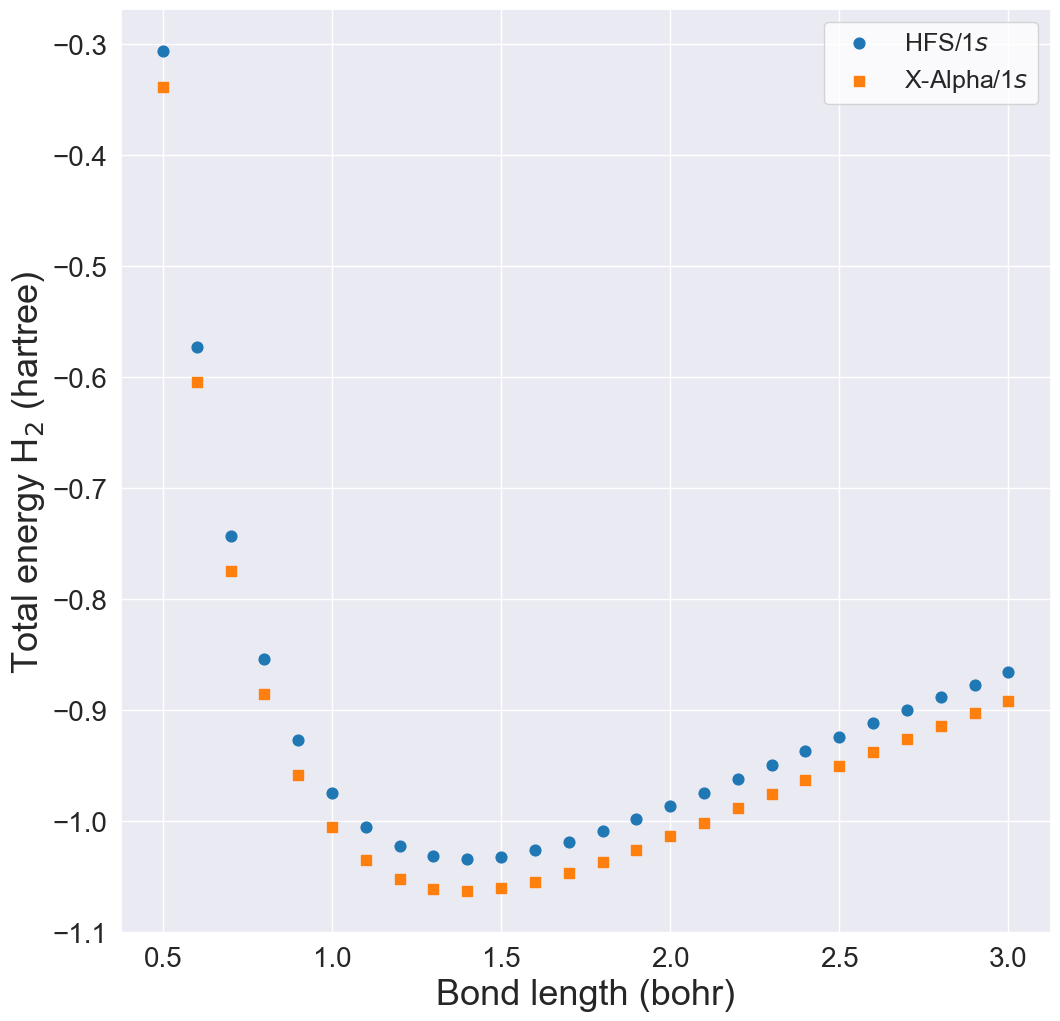

In [9]:
# Apply the default Seaborn theme
sns.set_theme()

# Get the Seaborn color palette
colors = sns.color_palette("tab10",10)

fig, ax = plt.subplots(figsize=(12, 12))

#ax.set(xlim=(0.3, 3.2), ylim=(-1.1,-0.2)) 

# Scatter plots with Seaborn colors and modified marker size
ax.scatter(bond_length, [x[-1] for x in HF_1s_OUT], color=colors[0], marker='o', s=60, label="HFS/1$s$")
ax.scatter(bond_length, [x[-1] for x in XA_1s_OUT], color=colors[1], marker='s', s=60, label="X-Alpha/1$s$")

ax.set_xlabel("Bond length (bohr)", fontsize=26)
ax.set_ylabel(r'Total energy H$_2$ (hartree)', fontsize=26)

# Add legend to the main plot with manually set location and white background
ax.legend(fontsize=18, facecolor='white')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
